# Coursera Capstone Project

## Business Problem

### Introduction

Bangalore , officially known as Bengaluru is the capital of the Indian state of Karnataka. It has a population of over 10 million, making it a megacity and the third most populous urban agglomeration in India. It is located in Southern India, on the Deccan Plateau at an elevation of over 900m
(3000ft) above sea level, which is the highest among India's major cities. It is multi-ethnic, multi-religious and cosmopolitan in nature.

## Problem Statement

I am currently pursuing my engineering from RNS Instittute of Technology, which is a college located in Bangalore. Lots of student studying in this college stay away from their homes during their 4 years of tenure of study. Being a student, I would like to reside in the neighborhood of the college. The main aim of this Capstone Project is to explore the venues of each neighborhood of this college and look for the neighborhoods having ample hostels,malls,restaurants,departmental stores, book stores and transportation etc. This analysis may help students who wish to reside nearby the college campus. 

## Data

I downloaded the required data from a website published by Government of India. Here is a link to the website:
https://data.gov.in/resources/all-india-pincode-directory-contact-details-along-latitude-and-longitude

This csv file, contains the list of pincodes of all cities of India, officenames (post office), the head office (HO) names of each officename etc. The Latitude and Longitude columns are incomplete for most areas. So, I will try to fill it with the help of Geopy. I am using Foursquare API to get the venues of each neighbourhood of the institution.

I have downloaded the required csv file and loaded this data into the project to be used as a data asset. I have then converted the csv file to pandas dataframe and displayed the head of the dataframe below. Further data formating steps are given below under the heading of "Formating and Cleaning Data".

In [1]:
import pandas as pd

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_59029e3d216943aabd0d76945fc61a26 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mir0vnpTe9Ny-ygAJrOZoam7uHwv6Rxk_kvweeOw2TKo',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_59029e3d216943aabd0d76945fc61a26.get_object(Bucket='finalcapstoneproject-donotdelete-pr-qfjhl8yxukwzns',Key='pincode_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,officename,pincode,officeType,Deliverystatus,divisionname,regionname,circlename,Taluk,Districtname,statename,Telephone,Related Suboffice,Related Headoffice,longitude,latitude
0,Achalapur B.O,504273,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Asifabad,Adilabad,TELANGANA,NaN,Rechini S.O,Mancherial H.O,NaN,NaN
1,Ada B.O,504293,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Asifabad,Adilabad,TELANGANA,NaN,Asifabad S.O,Mancherial H.O,NaN,NaN
2,Adegaon B.O,504307,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Boath,Adilabad,TELANGANA,NaN,Echoda S.O,Adilabad H.O,NaN,NaN
3,Adilabad Collectorate S.O,504001,S.O,Non-Delivery,Adilabad,Hyderabad,Andhra Pradesh,Adilabad,Adilabad,TELANGANA,08732-226703,NaN,Adilabad H.O,NaN,NaN
4,Adilabad H.O,504001,H.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Adilabad,Adilabad,TELANGANA,08732-226738,NaN,NaN,NaN,NaN


### Formating and Cleaning Data

1. The data pertaining to Districtname='Bangalore' is needed, so I will filter only the rows having Districtname = 'Bangalore'.
2. Since, RNSIT's Related HeadOffice is "Basavanagudi", only the data pertaining to this condition is kept.
3. Next, we will keep only the columns officename, pincode , longitude , latitude.
4. Multiple occurences of same pincode is checked.
5. Rename the column 'officename' as 'neighborhood' and combine the neighborhoods having the same pincode with a comma(,).

In [3]:
#1. Bangalore district data
bangalore_data = data[data.Districtname.str.contains("Bangalore") ==True]
bangalore_data.head()

,officename,pincode,officeType,Deliverystatus,divisionname,regionname,circlename,Taluk,Districtname,statename,Telephone,Related Suboffice,Related Headoffice,longitude,latitude
52175,A F Station Yelahanka S.O,560063,S.O,Delivery,Bangalore East,Bangalore HQ,Karnataka,Bangalore North,Bangalore,KARNATAKA,080-28478031,NaN,R T Nagar H.O,NaN,NaN
52176,Agram S.O,560007,S.O,Delivery,Bangalore East,Bangalore HQ,Karnataka,Bangalore South,Bangalore,KARNATAKA,080-25300192,NaN,H.A.L II Stage H.O,NaN,NaN
52177,Air Force Hospital S.O,560007,S.O,Non-Delivery,Bangalore East,Bangalore HQ,Karnataka,Bangalore North,Bangalore,KARNATAKA,080-25302699,NaN,H.A.L II Stage H.O,NaN,NaN
52178,Amruthahalli B.O,560092,B.O,Delivery,Bangalore East,Bangalore HQ,Karnataka,Bangalore North,Bangalore,KARNATAKA,NaN,Sahakaranagar P.O S.O,R T Nagar H.O,NaN,NaN
52179,Anandnagar S.O (Bangalore),560024,S.O,Non-Delivery,Bangalore East,Bangalore HQ,Karnataka,Bangalore North,Bangalore,KARNATAKA,080-23431761,NaN,R T Nagar H.O,NaN,NaN


In [4]:
#2. Related head office= Basavanagudi H.O
bangalore_data = bangalore_data.rename(columns = {"Related Headoffice" : "relatedHeadOffice"})
rnsit_data = bangalore_data[bangalore_data.relatedHeadOffice.str.contains("Basavanagudi") == True]
rnsit_data.head()

,officename,pincode,officeType,Deliverystatus,divisionname,regionname,circlename,Taluk,Districtname,statename,Telephone,Related Suboffice,relatedHeadOffice,longitude,latitude
52274,Adugodi S.O,560030,S.O,Delivery,Bangalore South,Bangalore HQ,Karnataka,Bangalore South,Bangalore,KARNATAKA,080-22240233,NaN,Basavanagudi H.O,NaN,NaN
52275,Agara B.O,560034,B.O,Non-Delivery,Bangalore South,Bangalore HQ,Karnataka,Bangalore South,Bangalore,KARNATAKA,NaN,Koramangala S.O,Basavanagudi H.O,NaN,NaN
52281,Bangalore Corporation Building S.O,560002,S.O,Non-Delivery,Bangalore South,Bangalore HQ,Karnataka,Bangalore South,Bangalore,KARNATAKA,080-22102754,NaN,Basavanagudi H.O,NaN,NaN
52286,Bnagalore Viswavidalaya S.O,560056,S.O,Delivery,Bangalore South,Bangalore HQ,Karnataka,Bangalore South,Bangalore,KARNATAKA,080-23393242,NaN,Basavanagudi H.O,NaN,NaN
52290,Carmelram S.O,560035,S.O,Delivery,Bangalore South,Bangalore HQ,Karnataka,Bangalore South,Bangalore,KARNATAKA,080-28439920,NaN,Basavanagudi H.O,77.6937,12.9078


In [5]:
#3. Keeping only the required Parameters of rnsit_data .i.e, officename,pincode,latitude,longitude
rnsit_data = rnsit_data[['officename','pincode','longitude','latitude']].reset_index()
rnsit_data = rnsit_data.drop(['index'],axis=1)
rnsit_data.head()

,officename,pincode,longitude,latitude
0,Adugodi S.O,560030,NaN,NaN
1,Agara B.O,560034,NaN,NaN
2,Bangalore Corporation Building S.O,560002,NaN,NaN
3,Bnagalore Viswavidalaya S.O,560056,NaN,NaN
4,Carmelram S.O,560035,77.6937,12.9078


In [6]:
#4. Checking for multiple occurences of each pincode
rnsit_data['pincode'].value_counts()

560034    4
560027    3
560060    3
560004    3
560074    3
560026    2
560056    2
560098    1
560002    1
560102    1
560110    1
560095    1
560035    1
560030    1
560018    1
560019    1
560053    1
560059    1
560070    1
Name: pincode, dtype: int64

In [7]:
#5. Renaming the column 'officename' to 'Neighbourhood' and combinging the neighbourhoods with the same pincode
rnsit_data = rnsit_data.groupby(['pincode'])['officename'].apply(','.join).reset_index()
rnsit_data = rnsit_data.rename(columns= {'officename': 'Neighborhood'})
rnsit_data

,pincode,Neighborhood
0,560002,Bangalore Corporation Building S.O
1,560004,"Mavalli S.O,Pampamahakavi Road S.O,Thyagarajna..."
2,560018,Chamrajpet S.O (Bangalore)
3,560019,Gaviopuram Extension S.O
4,560026,"Deepanjalinagar S.O,Governmemnt Electric Facto..."
5,560027,"Sampangiramnagar S.O,Shanthinagar S.O,Wilson G..."
6,560030,Adugodi S.O
7,560034,"Agara B.O,Koramangala I Block S.O,Koramangala ..."
8,560035,Carmelram S.O
9,560053,Chickpet S.O


## Geopy for finding latitude and longitude

In [8]:
# importing some stuff!!!!
import requests 

import numpy as np 
import random 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim


from IPython.display import Image 
from IPython.core.display import HTML 
    

from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium 
print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [9]:
#converting pincode to string type
rnsit_data = rnsit_data.astype({"pincode" : str})
rnsit_data.dtypes

pincode         object
Neighborhood    object
dtype: object

In [10]:
#adding columns latitude,longitude and address
rnsit_data["latitude"]=""
rnsit_data["longitude"]=""
rnsit_data["address"]=""
rnsit_data.head()

,pincode,Neighborhood,latitude,longitude,address
0,560002,Bangalore Corporation Building S.O,,,
1,560004,"Mavalli S.O,Pampamahakavi Road S.O,Thyagarajna...",,,
2,560018,Chamrajpet S.O (Bangalore),,,
3,560019,Gaviopuram Extension S.O,,,
4,560026,"Deepanjalinagar S.O,Governmemnt Electric Facto...",,,


In [11]:
#getting latitude longitude and address
!pip install pgeocode
import pgeocode
country_code = 'in'
for index, row in rnsit_data.iterrows():
    
    pin_code=row['pincode']
    nomi = pgeocode.Nominatim(country_code)
    place_details = nomi.query_postal_code(pin_code)
    row['latitude']=place_details.latitude
    row['longitude']=place_details.longitude
    row['address']=place_details.place_name

rnsit_data.head()

,pincode,Neighborhood,latitude,longitude,address
0,560002,Bangalore Corporation Building S.O,13.2257,77.5844,"Bangalore City, Bangalore Corporation Building"
1,560004,"Mavalli S.O,Pampamahakavi Road S.O,Thyagarajna...",12.9833,77.5833,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,..."
2,560018,Chamrajpet S.O (Bangalore),13.2257,77.5712,"Chamrajpet (Bangalore), Goripalya SO"
3,560019,Gaviopuram Extension S.O,NaN,NaN,NaN
4,560026,"Deepanjalinagar S.O,Governmemnt Electric Facto...",12.9996,77.6359,"Deepanjalinagar, Nayandahalli, Governmemnt Ele..."


In [12]:
#removing neighborhood column and renaming address column to Neighborhood
rnsit_data = rnsit_data.drop(['Neighborhood'],axis=1)
rnsit_data = rnsit_data.rename(columns = {"address" : "neighborhood"})
rnsit_data.head()

,pincode,latitude,longitude,neighborhood
0,560002,13.2257,77.5844,"Bangalore City, Bangalore Corporation Building"
1,560004,12.9833,77.5833,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,..."
2,560018,13.2257,77.5712,"Chamrajpet (Bangalore), Goripalya SO"
3,560019,NaN,NaN,NaN
4,560026,12.9996,77.6359,"Deepanjalinagar, Nayandahalli, Governmemnt Ele..."


In [13]:
#removing the 3rd value because latitude and longitude is not available for the pincode
rnsit_data = rnsit_data.drop(rnsit_data.index[3])
rnsit_data.head()

,pincode,latitude,longitude,neighborhood
0,560002,13.2257,77.5844,"Bangalore City, Bangalore Corporation Building"
1,560004,12.9833,77.5833,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,..."
2,560018,13.2257,77.5712,"Chamrajpet (Bangalore), Goripalya SO"
4,560026,12.9996,77.6359,"Deepanjalinagar, Nayandahalli, Governmemnt Ele..."
5,560027,13.2257,77.5885,"Wilson Garden, Shanthinagar, Sampangiramnagar"


In [14]:
#moving neighborhood column to the front of the dataframe
data2 = rnsit_data['neighborhood']
rnsit_data.drop(labels=['neighborhood'],axis=1,inplace=True)
rnsit_data.insert(0,'neighborhood',data2)
rnsit_data

,neighborhood,pincode,latitude,longitude
0,"Bangalore City, Bangalore Corporation Building",560002,13.2257,77.5844
1,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,...",560004,12.9833,77.5833
2,"Chamrajpet (Bangalore), Goripalya SO",560018,13.2257,77.5712
4,"Deepanjalinagar, Nayandahalli, Governmemnt Ele...",560026,12.9996,77.6359
5,"Wilson Garden, Shanthinagar, Sampangiramnagar",560027,13.2257,77.5885
6,Adugodi,560030,13.2257,77.575
7,"Agara, Koramangala, Koramangala I Block, St. J...",560034,13.2257,77.6415
8,Carmelram,560035,13.0108,77.7494
9,Chickpet,560053,12.9979,77.5861
10,"Bengaluru Vishwavidyalaya, Mallathahalli",560056,12.9979,77.5861


In [15]:
#map of Bangalore neighborhoods!!
address = 'Bangalore'

geolocator = Nominatim(user_agent="bangalore_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_rnsit = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, label in zip(rnsit_data['latitude'], rnsit_data['longitude'], rnsit_data['neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_rnsit)  
    
map_rnsit

## Foursquare API to get venues

In [16]:
#Foursquare API credentials
CLIENT_ID = "ZCQN5KZGNDNGVJOVLPYKX34S01UCADHJIPDAPFPBQMU0NR2H"
CLIENT_SECRET = "MDPICAHBDOG2GDKT2KRMWZUMCHZ2Y0SCQYCNK2YR0FQ4V5GF"
VERSION = "20200119"
print("Client_id:",CLIENT_ID)
print("Client_secret:",CLIENT_SECRET)

Client_id: ZCQN5KZGNDNGVJOVLPYKX34S01UCADHJIPDAPFPBQMU0NR2H
Client_secret: MDPICAHBDOG2GDKT2KRMWZUMCHZ2Y0SCQYCNK2YR0FQ4V5GF


In [17]:
#function to get nearby venues of each neighbourhood of iit Bombay
LIMIT=100
radius=500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
       
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
       
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
#running the above function
rnsit_venues = getNearbyVenues(names=rnsit_data['neighborhood'],latitudes=rnsit_data['latitude'],longitudes=rnsit_data['longitude'])

Bangalore City, Bangalore Corporation Building
Mavalli, Basavanagudi H.O, Pampamahakavi Road, Gavipuram Extension, Thyagarajnagar
Chamrajpet (Bangalore), Goripalya SO
Deepanjalinagar, Nayandahalli, Governmemnt Electric Factory
Wilson Garden, Shanthinagar, Sampangiramnagar
Adugodi
Agara, Koramangala, Koramangala I Block, St. John's Medical College
Carmelram
Chickpet
Bengaluru Vishwavidyalaya, Mallathahalli
Rv Niketan
Sulikere, Chudenapura, Kengeri
Tyagrajnagar, Padmanabhnagar, B Sk II Stage
Ramohalli, Kumbalgodu Gollahalli, Kumbalagodu
Koramangala VI Bk
Pattanagere, Rajarajeshwarinagar
HSR Layout
Ullalu Upanagar


In [19]:
rnsit_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,...",12.9833,77.5833,Taj West End,12.984572,77.584893,Hotel
1,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,...",12.9833,77.5833,Bangalore Turf Club,12.983914,77.583140,Racetrack
2,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,...",12.9833,77.5833,Masala Klub,12.984993,77.585115,Indian Restaurant
3,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,...",12.9833,77.5833,Blue Ginger,12.984804,77.584045,Vietnamese Restaurant
4,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,...",12.9833,77.5833,The Blue Bar,12.984872,77.583973,Hotel Bar


In [20]:
#one-hot encoding
rnsit_onehot = pd.get_dummies(rnsit_venues[['Venue Category']], prefix="", prefix_sep="")
rnsit_onehot.head()

,Andhra Restaurant,Art Gallery,Asian Restaurant,Boutique,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Dance Studio,...,Multiplex,Office,Pub,Racetrack,Restaurant,Seafood Restaurant,Shopping Mall,Soccer Field,Theme Park Ride / Attraction,Vietnamese Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
rnsit_onehot['Neighborhood'] = rnsit_venues['Neighborhood']
#moving neighborhood column to the first column
fixed_columns = [rnsit_onehot.columns[-1]] + list(rnsit_onehot.columns[:-1])
rnsit_onehot = rnsit_onehot[fixed_columns]
rnsit_onehot.head()

,Neighborhood,Andhra Restaurant,Art Gallery,Asian Restaurant,Boutique,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,...,Multiplex,Office,Pub,Racetrack,Restaurant,Seafood Restaurant,Shopping Mall,Soccer Field,Theme Park Ride / Attraction,Vietnamese Restaurant
0,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,...",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
rnsit_grouped = rnsit_onehot.groupby('Neighborhood').mean().reset_index()
rnsit_grouped.head()

,Neighborhood,Andhra Restaurant,Art Gallery,Asian Restaurant,Boutique,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,...,Multiplex,Office,Pub,Racetrack,Restaurant,Seafood Restaurant,Shopping Mall,Soccer Field,Theme Park Ride / Attraction,Vietnamese Restaurant
0,Adugodi,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,"Agara, Koramangala, Koramangala I Block, St. J...",0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,"Bengaluru Vishwavidyalaya, Mallathahalli",0.083333,0.083333,0.0,0.083333,0.166667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.083333,0.0,0.083333,0.0,0.0,0.083333,0.0,0.0
3,Carmelram,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,Chickpet,0.083333,0.083333,0.0,0.083333,0.166667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.083333,0.0,0.083333,0.0,0.0,0.083333,0.0,0.0


In [23]:
#getting top 5 venues for each neighborhood
num_top_venues = 5

for hood in rnsit_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = rnsit_grouped[rnsit_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adugodi----
                          venue  freq
0                          Farm   1.0
1             Andhra Restaurant   0.0
2                    Hotel Pool   0.0
3  Theme Park Ride / Attraction   0.0
4                  Soccer Field   0.0


----Agara, Koramangala, Koramangala I Block, St. John's Medical College----
                          venue  freq
0              Asian Restaurant   1.0
1             Andhra Restaurant   0.0
2                    Hotel Pool   0.0
3  Theme Park Ride / Attraction   0.0
4                  Soccer Field   0.0


----Bengaluru Vishwavidyalaya, Mallathahalli----
               venue  freq
0  Indian Restaurant  0.17
1               Café  0.17
2  Andhra Restaurant  0.08
3        Art Gallery  0.08
4              Hotel  0.08


----Carmelram----
                          venue  freq
0             Convenience Store   1.0
1             Andhra Restaurant   0.0
2                    Hotel Pool   0.0
3  Theme Park Ride / Attraction   0.0
4                  Soccer F

In [24]:
#function to return sorted venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
# getting top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']


columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = rnsit_grouped['Neighborhood']

for ind in np.arange(rnsit_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rnsit_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adugodi,Farm,Vietnamese Restaurant,Hotel,Art Gallery,Asian Restaurant,Boutique,Café,Chinese Restaurant,Clothing Store,Coffee Shop
1,"Agara, Koramangala, Koramangala I Block, St. J...",Asian Restaurant,Vietnamese Restaurant,Hotel,Art Gallery,Boutique,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store
2,"Bengaluru Vishwavidyalaya, Mallathahalli",Café,Indian Restaurant,Boutique,Hotel,Dance Studio,Pub,Andhra Restaurant,Restaurant,Art Gallery,Soccer Field
3,Carmelram,Convenience Store,Vietnamese Restaurant,Hotel,Art Gallery,Asian Restaurant,Boutique,Café,Chinese Restaurant,Clothing Store,Coffee Shop
4,Chickpet,Café,Indian Restaurant,Boutique,Hotel,Dance Studio,Pub,Andhra Restaurant,Restaurant,Art Gallery,Soccer Field


## Clustering and Visualizing Neighborhoods

In [26]:
#finding optimal 'k' with silhouette method :D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

rnsit_grouped_clustering=rnsit_grouped.drop(['Neighborhood'],axis=1)
sil = []

K= range(2,8)
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 8):
  kmeans = KMeans(n_clusters = k).fit(rnsit_grouped_clustering)
  labels = kmeans.labels_
  sil.append(silhouette_score(rnsit_grouped_clustering, labels, metric = 'euclidean'))

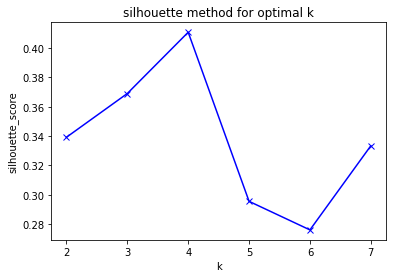

In [27]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt

# according to plot k=3 is the most optimal!!
plt.plot(K,sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('silhouette method for optimal k')
plt.show()

In [28]:
# setting number of clusters
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rnsit_grouped_clustering)
kmeans.labels_[0:10]

array([3, 1, 0, 2, 0, 0, 0, 0, 0], dtype=int32)

In [29]:
rnsit_data= rnsit_data.rename(columns = {"neighborhood": "Neighborhood"}) 
rnsit_data.head()

,Neighborhood,pincode,latitude,longitude
0,"Bangalore City, Bangalore Corporation Building",560002,13.2257,77.5844
1,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,...",560004,12.9833,77.5833
2,"Chamrajpet (Bangalore), Goripalya SO",560018,13.2257,77.5712
4,"Deepanjalinagar, Nayandahalli, Governmemnt Ele...",560026,12.9996,77.6359
5,"Wilson Garden, Shanthinagar, Sampangiramnagar",560027,13.2257,77.5885


In [30]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)
rnsit_merged = rnsit_data
rnsit_merged = rnsit_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
rnsit_merged.head()

,Neighborhood,pincode,latitude,longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bangalore City, Bangalore Corporation Building",560002,13.2257,77.5844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,...",560004,12.9833,77.5833,0.0,Hotel,Indian Restaurant,Vietnamese Restaurant,Office,Coffee Shop,Gym,Hotel Pool,Juice Bar,Hotel Bar,Racetrack
2,"Chamrajpet (Bangalore), Goripalya SO",560018,13.2257,77.5712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Deepanjalinagar, Nayandahalli, Governmemnt Ele...",560026,12.9996,77.6359,0.0,Clothing Store,Shopping Mall,Multiplex,Fast Food Restaurant,Vietnamese Restaurant,Gym,Art Gallery,Asian Restaurant,Boutique,Café
5,"Wilson Garden, Shanthinagar, Sampangiramnagar",560027,13.2257,77.5885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#removing Nan!!
rnsit_merged = rnsit_merged[np.isfinite(rnsit_merged['ClusterLabels'])].reset_index()
rnsit_merged= rnsit_merged.drop(['index'],axis=1)

In [32]:
rnsit_merged['ClusterLabels'] = rnsit_merged['ClusterLabels'].astype(int)

In [33]:
rnsit_merged.head()

,Neighborhood,pincode,latitude,longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,...",560004,12.9833,77.5833,0,Hotel,Indian Restaurant,Vietnamese Restaurant,Office,Coffee Shop,Gym,Hotel Pool,Juice Bar,Hotel Bar,Racetrack
1,"Deepanjalinagar, Nayandahalli, Governmemnt Ele...",560026,12.9996,77.6359,0,Clothing Store,Shopping Mall,Multiplex,Fast Food Restaurant,Vietnamese Restaurant,Gym,Art Gallery,Asian Restaurant,Boutique,Café
2,Adugodi,560030,13.2257,77.575,3,Farm,Vietnamese Restaurant,Hotel,Art Gallery,Asian Restaurant,Boutique,Café,Chinese Restaurant,Clothing Store,Coffee Shop
3,"Agara, Koramangala, Koramangala I Block, St. J...",560034,13.2257,77.6415,1,Asian Restaurant,Vietnamese Restaurant,Hotel,Art Gallery,Boutique,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store
4,Carmelram,560035,13.0108,77.7494,2,Convenience Store,Vietnamese Restaurant,Hotel,Art Gallery,Asian Restaurant,Boutique,Café,Chinese Restaurant,Clothing Store,Coffee Shop


In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(rnsit_merged['latitude'], rnsit_merged['longitude'], rnsit_merged['Neighborhood'], rnsit_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining Clusters

In [35]:
## cluster 0!! only displaying heads!! 
rnsit_merged.loc[rnsit_merged['ClusterLabels'] == 0, rnsit_merged.columns[[0] + list(range(5, rnsit_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Mavalli, Basavanagudi H.O, Pampamahakavi Road,...",Hotel,Indian Restaurant,Vietnamese Restaurant,Office,Coffee Shop,Gym,Hotel Pool,Juice Bar,Hotel Bar,Racetrack
1,"Deepanjalinagar, Nayandahalli, Governmemnt Ele...",Clothing Store,Shopping Mall,Multiplex,Fast Food Restaurant,Vietnamese Restaurant,Gym,Art Gallery,Asian Restaurant,Boutique,Café
5,Chickpet,Café,Indian Restaurant,Boutique,Hotel,Dance Studio,Pub,Andhra Restaurant,Restaurant,Art Gallery,Soccer Field
6,"Bengaluru Vishwavidyalaya, Mallathahalli",Café,Indian Restaurant,Boutique,Hotel,Dance Studio,Pub,Andhra Restaurant,Restaurant,Art Gallery,Soccer Field
7,Rv Niketan,Café,Indian Restaurant,Boutique,Hotel,Dance Studio,Pub,Andhra Restaurant,Restaurant,Art Gallery,Soccer Field


In [36]:
## cluster 1!! only displaying heads!! 
rnsit_merged.loc[rnsit_merged['ClusterLabels'] == 1, rnsit_merged.columns[[0] + list(range(5, rnsit_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,"Agara, Koramangala, Koramangala I Block, St. J...",Asian Restaurant,Vietnamese Restaurant,Hotel,Art Gallery,Boutique,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store


In [37]:
## cluster 2!! only displaying heads!! 
rnsit_merged.loc[rnsit_merged['ClusterLabels'] == 2, rnsit_merged.columns[[0] + list(range(5, rnsit_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Carmelram,Convenience Store,Vietnamese Restaurant,Hotel,Art Gallery,Asian Restaurant,Boutique,Café,Chinese Restaurant,Clothing Store,Coffee Shop


In [38]:
## cluster 3!! only displaying heads!!
rnsit_merged.loc[rnsit_merged['ClusterLabels'] == 3, rnsit_merged.columns[[0] + list(range(5,rnsit_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Adugodi,Farm,Vietnamese Restaurant,Hotel,Art Gallery,Asian Restaurant,Boutique,Café,Chinese Restaurant,Clothing Store,Coffee Shop
